In [46]:
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup

In [36]:
URL1 = 'https://summerofcode.withgoogle.com/archive/2018/organizations/'
URL2 = 'https://summerofcode.withgoogle.com/archive/2019/organizations/'
URL3 = 'https://summerofcode.withgoogle.com/archive/2020/organizations/'
page1 = requests.get(URL1)
page2 = requests.get(URL2)
page3 = requests.get(URL3)

soup1 = BeautifulSoup(page1.content, 'html.parser')
soup2 = BeautifulSoup(page2.content, 'html.parser')
soup3 = BeautifulSoup(page3.content, 'html.parser')
ar = []
ar2 = []

In [37]:
content1 = soup1.find_all("li", class_="organization-card__container")
content2 = soup2.find_all("li", class_="organization-card__container")
content3 = soup3.find_all("li", class_="organization-card__container")
for i in content1:
    ar.append(i['aria-label'])
for i in content2:
    ar.append(i['aria-label'])
for i in content3:
    ar.append(i['aria-label'])
# print(ar)
text = " ".join(ar)
ar2 = text.split(' ')

In [45]:
org_count = {}

for i in ar:
    if i not in org_count:
        org_count[i] = 1
    else:
        org_count[i] += 1

org_count = dict(sorted(org_count.items(), key=lambda item: item[1], reverse=True))

keys = [x for x in org_count.keys() if org_count[x]==3]
# values = org_count.values()[:20]

print(keys)

['AerospaceResearch.net', 'Amahi', 'Apertium', 'Blender Foundation', 'BRL-CAD', 'Catrobat', 'CCExtractor Development', 'CERN-HSF', 'Checker Framework', 'Cloud Native Computing Foundation (CNCF)', 'CloudCV', 'DBpedia', 'Django Software Foundation', 'Drupal', 'Fedora Project', 'FFmpeg', 'Free and Open Source Silicon Foundation', 'FreeType', 'Gentoo Foundation', 'Git', 'Global Alliance for Genomics and Health', 'GNOME', 'GNSS-SDR', 'GNU Octave', 'GNU Radio', 'Godot Engine', 'Haiku', 'INCF', 'Inkscape', 'Intel Media And Audio For Linux', 'Internet Archive', 'JBoss Community', 'JdeRobot - Universidad Rey Juan Carlos', 'Jenkins project', 'KDE Community', 'Kiwix', 'LabLua', 'LibreHealth', 'LibreOffice', 'MariaDB Foundation', 'mlpack', 'Mozilla', 'MuseScore', 'National Resource for Network Biology (NRNB)', 'Neovim', 'NumFOCUS', 'Open Chemistry', 'Open Source Robotics Foundation', 'OpenMRS', 'OpenStreetMap', 'OpenWISP', 'Oppia Foundation', 'OSGeo', 'OWASP Foundation', 'PEcAn Project', 'Performa

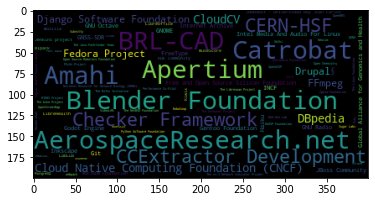

In [40]:
wordcloud = WordCloud().generate_from_frequencies(org_count)
plt.imshow(wordcloud)